In [113]:
import os
import cv2
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras 
from keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [114]:
path="E:\COLLEGE\SEMESTER 5\Deep Learning\CNN\data"
pd.DataFrame(os.listdir(path),columns=['Files'])

,Files
0,chest_xray
1,test
2,train
3,val


In [115]:
dict_={'train':[],'test':[],'val':[]}
for i in tqdm(['train','test','val']):
    path_=os.path.join(path,i)
    for j in os.listdir(path_):
        dict_[i].append(len(os.listdir(os.path.join(path_,j))))
        
pd.DataFrame(dict_,index=os.listdir(path_))

100%|██████████| 3/3 [00:00<00:00, 75.67it/s]


,train,test,val
NORMAL,1341,234,8
PNEUMONIA,3875,390,8


In [116]:
Size=150
images=[]
labels=[]
def load():
    global images
    global labels
    for folder in ['train','test','val']:
        path_=os.path.join(path,folder)
        for files in os.listdir(path_):
            path2=os.path.join(path_,files)
            for img in os.listdir(path2):
                image=cv2.imread(os.path.join(path2,img))
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,(Size,Size))
                image=image/255.0
                images.append(image)
                labels.append(files)      
load()
images=np.array(images)
labels=np.array(labels)

In [117]:
print('Images Shape :',images.shape)
print('Labels Shape :',labels.shape)

Images Shape : (5856, 150, 150, 3)
Labels Shape : (5856,)


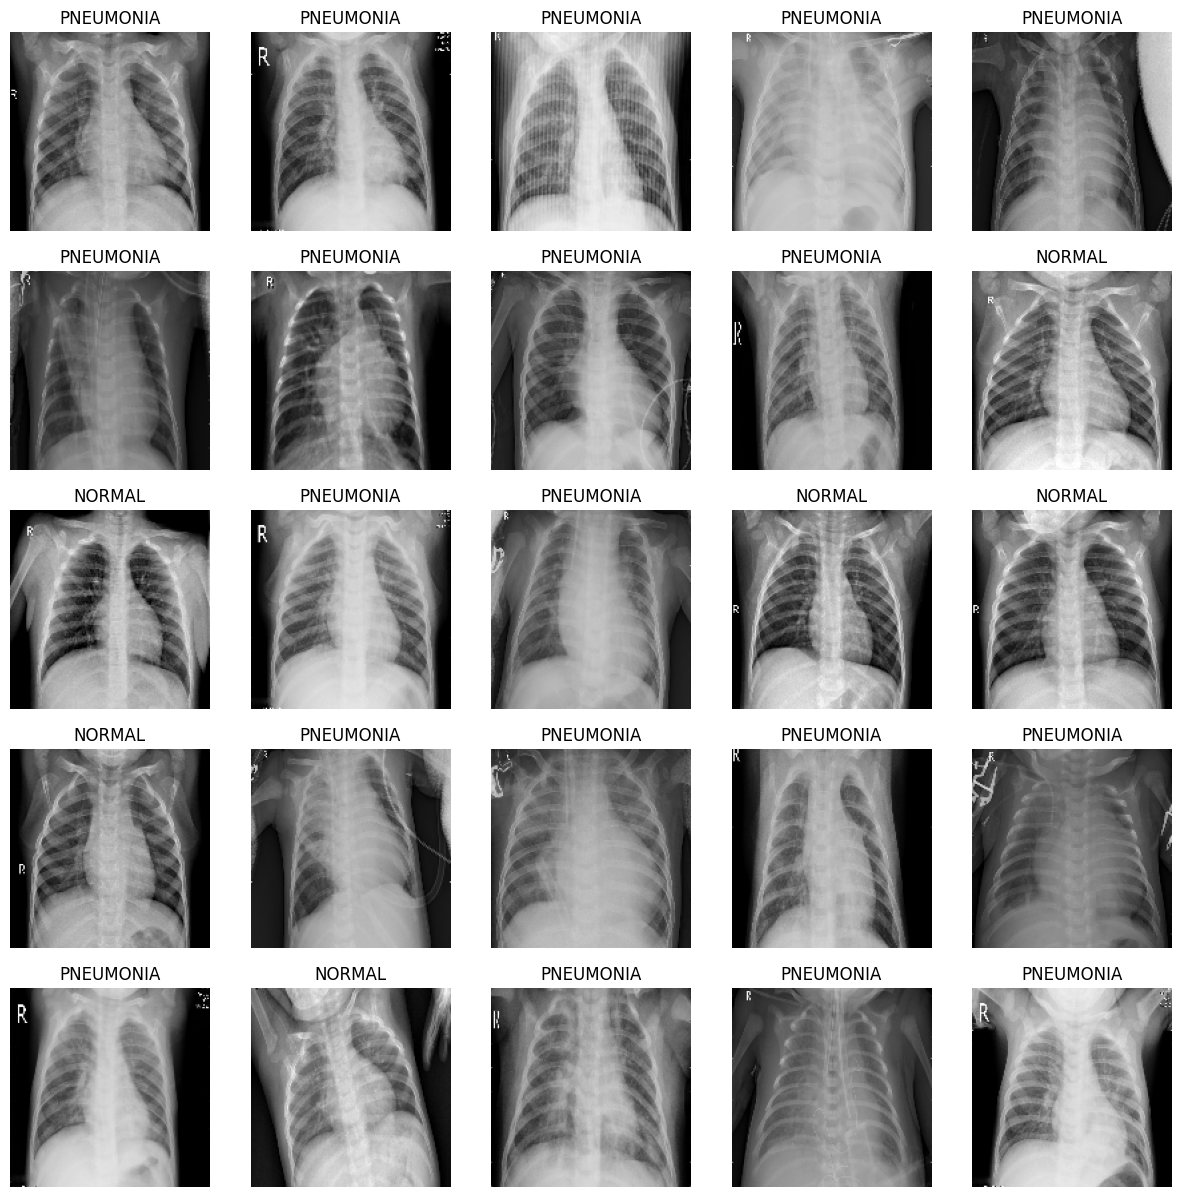

In [118]:
plt.figure(figsize=(15,15))
x = 1
for i in np.random.randint(0,len(images),25):
    plt.subplot(5, 5, x)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')    
    x += 1

In [119]:
label=LabelEncoder()
labels=label.fit_transform(labels)
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [120]:
X_train, X_test2, y_train, y_test2 = train_test_split(images, labels, test_size=0.30, random_state=44, shuffle =True)
X_val, X_test, y_val, y_test = train_test_split(X_test2, y_test2, test_size=0.50, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_val shape is ' , X_val.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_val shape is ' , y_val.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4099, 150, 150, 3)
X_val shape is  (878, 150, 150, 3)
X_test shape is  (879, 150, 150, 3)
y_train shape is  (4099,)
y_val shape is  (878,)
y_test shape is  (879,)


In [121]:
model=Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((3,3)))  

model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPool2D((2,2))) 
model.add(Dropout(.5)) 

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2))) 
model.add(Dropout(.3)) 
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(.3)) 

model.add(Dense(128,activation='relu')) 
model.add(Dropout(.3)) 

model.add(Dense(150,activation='relu')) 
model.add(Dropout(.3)) 

model.add(Dense(1,activation='sigmoid'))

In [122]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 batch_normalization_24 (Bat  (None, 148, 148, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 batch_normalization_25 (Bat  (None, 47, 47, 32)       128       
 chNormalization)                                                
                                                      

In [157]:
checkpoint_cb =ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/50
129/129 [==============================] - 4s 23ms/step - loss: 0.0612 - accuracy: 0.9776 - val_loss: 0.8244 - val_accuracy: 0.7551
Epoch 2/50
129/129 [==============================] - 2s 18ms/step - loss: 0.0748 - accuracy: 0.9741 - val_loss: 1.7807 - val_accuracy: 0.6595
Epoch 3/50
129/129 [==============================] - 2s 18ms/step - loss: 0.0582 - accuracy: 0.9817 - val_loss: 0.3699 - val_accuracy: 0.9317
Epoch 4/50
129/129 [==============================] - 2s 19ms/step - loss: 0.0680 - accuracy: 0.9712 - val_loss: 0.2150 - val_accuracy: 0.9362
Epoch 5/50
129/129 [==============================] - 2s 18ms/step - loss: 0.0582 - accuracy: 0.9780 - val_loss: 0.1855 - val_accuracy: 0.9442
Epoch 6/50
129/129 [==============================] - 2s 18ms/step - loss: 0.0564 - accuracy: 0.9793 - val_loss: 3.7978 - val_accuracy: 0.7847
Epoch 7/50
129/129 [==============================] - 2s 18ms/step - loss: 0.0600 - accuracy: 0.9795 - val_loss: 1.0395 - val_accuracy: 0.6993

In [165]:
hist_=pd.DataFrame(hist.history)

score, acc = model.evaluate(X_test,y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

28/28 [==============================] - 0s 10ms/step - loss: 0.0865 - accuracy: 0.9693
Test Loss = 0.08653783798217773
Test Accuracy = 0.9692832827568054


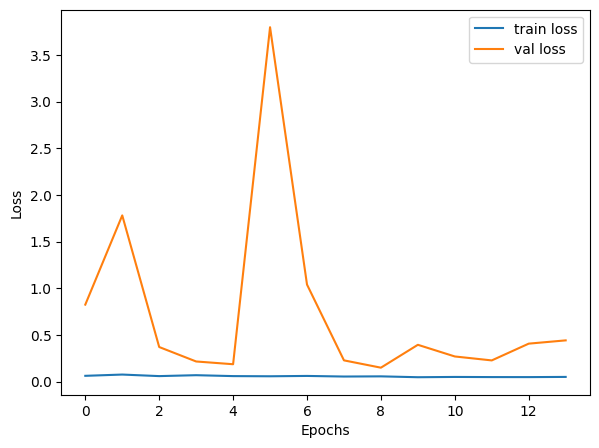

In [166]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='train loss')
plt.plot(hist_['val_loss'],label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [167]:
prediction = model.predict(X_test)
prediction[0]

28/28 [==============================] - 0s 6ms/step


array([0.00927231], dtype=float32)

In [168]:
y_pred=np.where(prediction>=.5,1,0)
df=pd.DataFrame()
df['Actual'],df['Prediction']=label.inverse_transform(y_test),label.inverse_transform(y_pred)
df

,Actual,Prediction
0,NORMAL,NORMAL
1,NORMAL,NORMAL
2,PNEUMONIA,PNEUMONIA
3,PNEUMONIA,PNEUMONIA
4,PNEUMONIA,PNEUMONIA
...,...,...
874,PNEUMONIA,PNEUMONIA
875,PNEUMONIA,PNEUMONIA
876,PNEUMONIA,PNEUMONIA
877,PNEUMONIA,PNEUMONIA


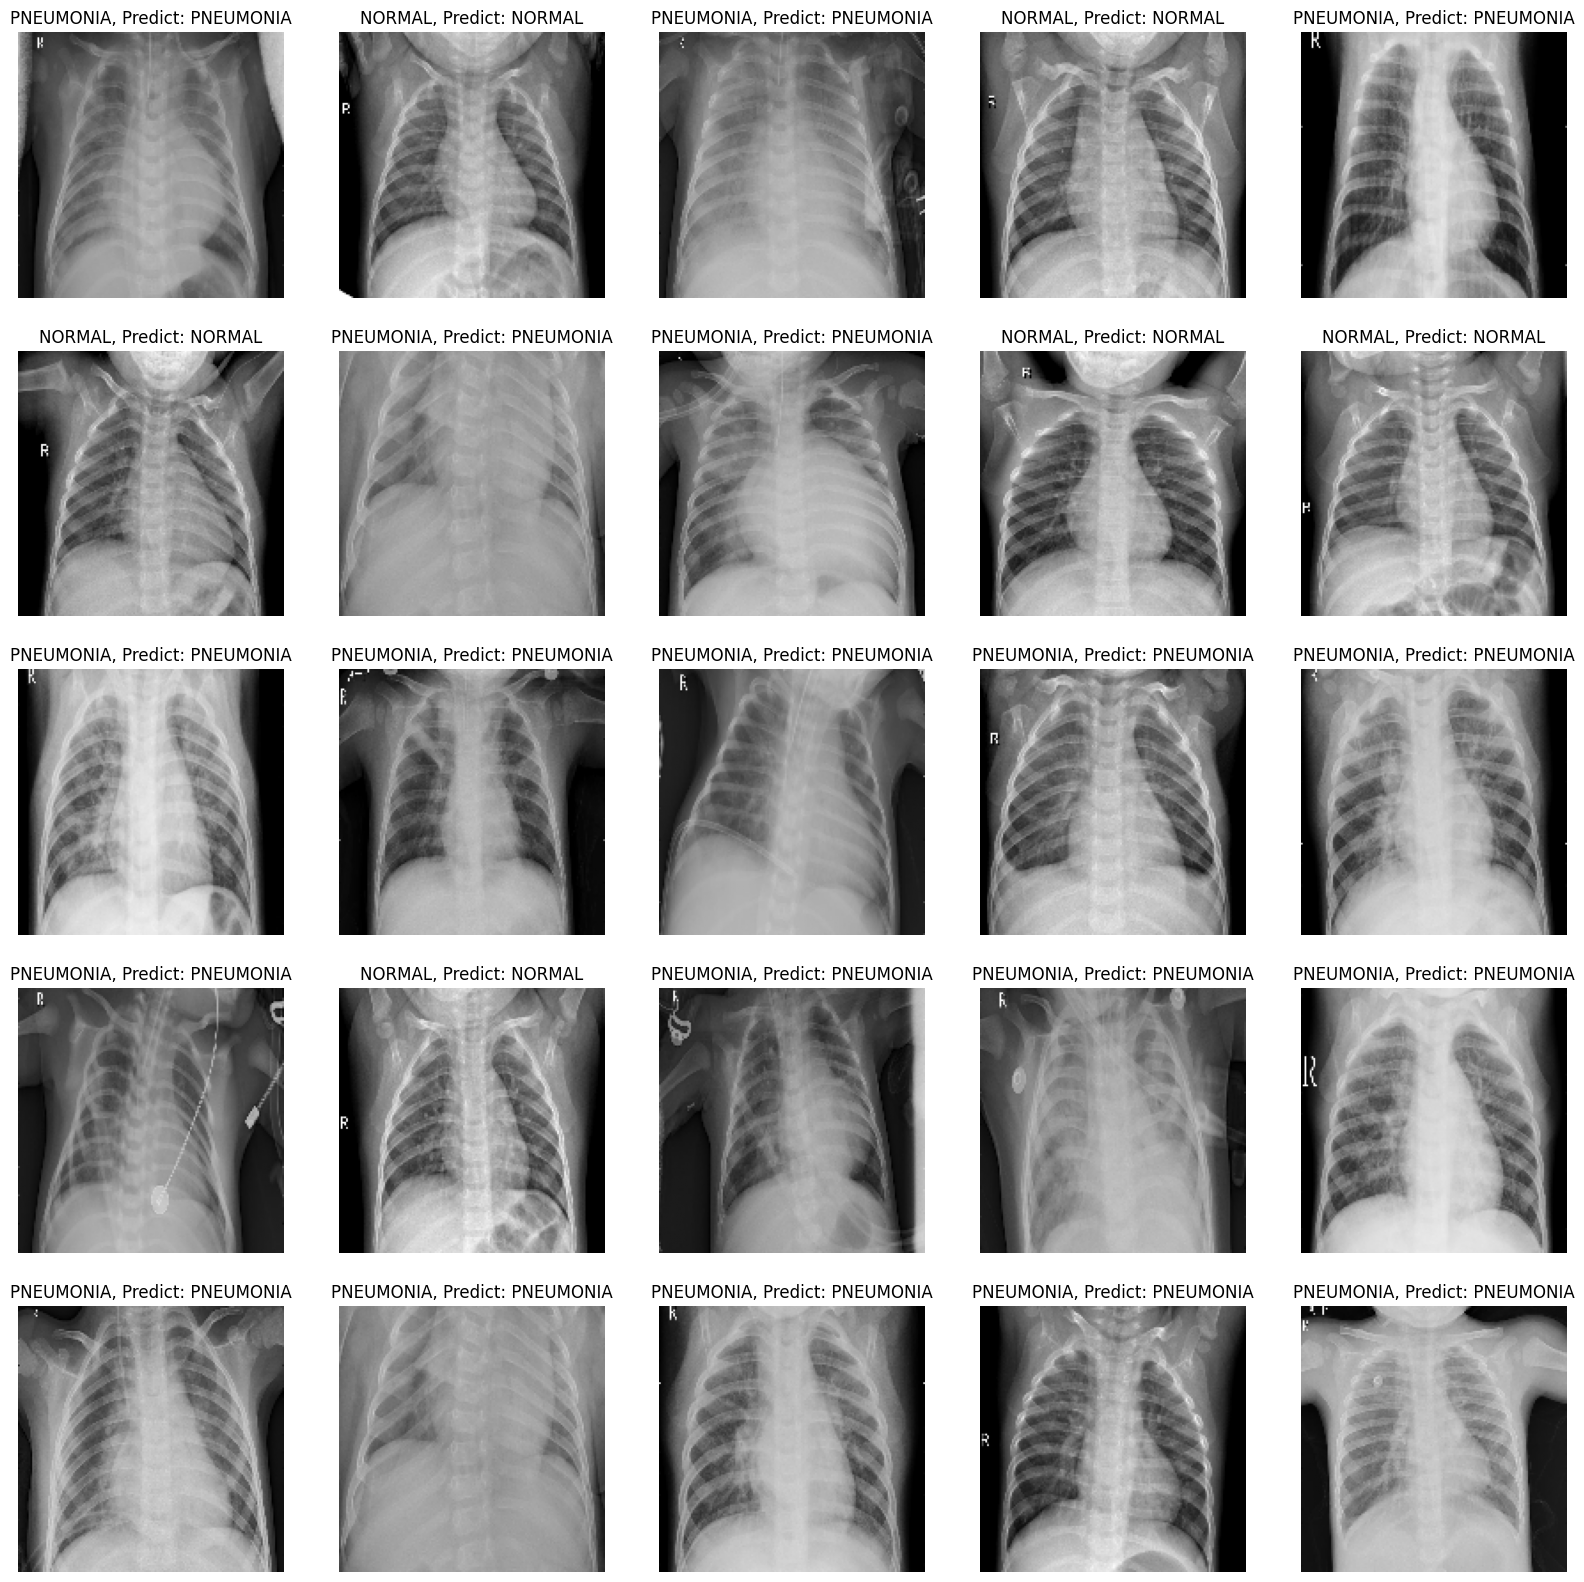

In [162]:
y_test2=label.inverse_transform(y_test)
y_pred2=label.inverse_transform(y_pred)
plt.figure(figsize=(20,20))
x = 1
for i in np.random.randint(0,len(X_test),25):
    plt.subplot(5, 5, x)
    plt.imshow(X_test[i])
    plt.title(f'{y_test2[i]}, Predict: {y_pred2[i]}')
    plt.axis('off')    
    x += 1

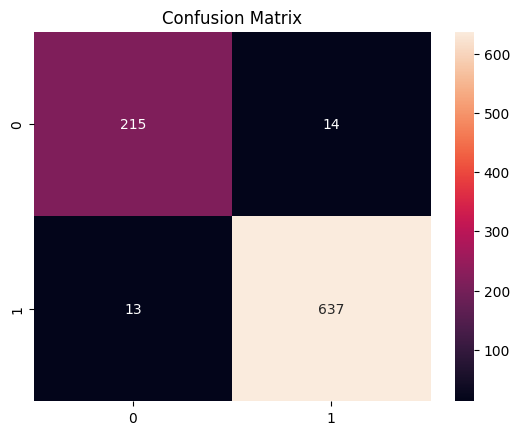

In [163]:
ax= plt.subplot()
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True, fmt='g',)
ax.set_title('Confusion Matrix')
plt.show()

In [169]:
print( classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       229
           1       0.98      0.98      0.98       650

    accuracy                           0.97       879
   macro avg       0.96      0.96      0.96       879
weighted avg       0.97      0.97      0.97       879

